# COMP_2704: Supervised Machine Learning
## Final Project
### Jasleen Kaur
> **Use Case and Data Selection**
>> **Requirements**

> **Model Development**
>> **Decision Tree,**
>> **Support Vector Machine**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import utils
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Use Case and Data Selection: Requirements

**Description of each feature in the data set.**

The heart failure clinical data can be used to develop a predictive model based on their risk of heart failure: low-risk, medium-risk, high-risk.

1. low-risk - intensive care and treatment
2. medium-risk - medication management, lifestyle changes, close monitoring
3. high-risk - frequent monitoring, lifestyle modyfications, early treatment

This dataset contains **299 records** and **12 features** that can be used to predict mortality by heart failure.

Following are the 12 features of this dataset:

1. age (45 to 90) - age of the patient in years
2. anaemia - decrease of red blood cells or hemoglobin (boolean)
3. creatinine_phosphokinase - level of the CPK enzyme in the blood (mcg/L)
4. diabetes - if the patient has diabetes (boolean)
5. ejection_fraction - percentage of blood leaving the heart at each contraction (percentage)
6. high_blood_pressure - if the patient has hypertension (boolean)
7. platelets - platelets in the blood (kiloplatelets/mL)
8. serum_creatinine - level of serum creatinine in the blood (mg/dL)
9. serum_sodium - level of serum sodium in the blood (mEq/L)
10. sex - woman or man (binary)
11. smoking - if the patient smokes or not (boolean)
12. time - follow-up period (days)

The prediction is the DEATH_EVENT, which is either 1(yes) or 0(no) - if the patient died during the follow-up period (boolean)

**Are false positives or negatives for one of the classes to be avoided? Or are all errors equally bad?**

**False Positive:** Actually low-risk, Predicted high-risk.

**False Negative:** Actually high-risk, Predicted low-risk.

According to me, after having a clear understanding of the data, I think that false negatives are generally more concerning than the false positives. On the other hand, false positives means that treating low-risk patients with extra care, testing.
Therefore, the model should be optimized to minimize false negatives.

**Data cleaning, with check that it is clean using Pandas.**

In [2]:
# load data into pandas dataframe called df
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
# checking if there is any datatype other than int or float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Statistical or categorical description using the Pandas describe function. Provide written observations.**

In [4]:
# description of the data using pandas describe function
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Observations**

By using the pandas describe function, I can conclude that:
1. There are 299 records for each of the feature.
2. The mean, standard deviation, minimum value, 25%, 50% & 75% of each feature, and the maximum value of each feature is displayed.

**Bar graph showing the count of class. Provide written observations.**

Text(0.5, 1.0, 'Death Event v/s Count of the Patients')

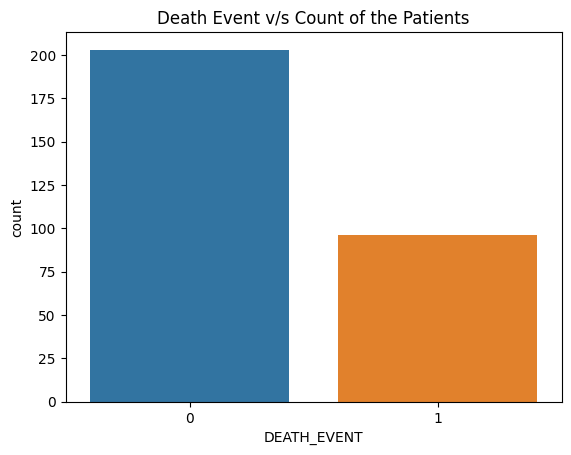

In [5]:
# using countplot to plot the bar graph of the class 
sb.countplot(data = df, x = 'DEATH_EVENT')

# count the exact number of patients
counts = df['DEATH_EVENT'].value_counts()
    
# giving title to the bar graph
plt.title('Death Event v/s Count of the Patients')

In [6]:
# check the exact number of patients who experienced death or not
# count = df['DEATH_EVENT'].value_counts()
# print(count)

**Observations**

In this bar graph, 0 represents that the patients did not experience death, whereas 1 represents that the patients experienced death. So, according to this graph, 203 patients did not experience death, whereas 96 patients experienced death.

# Decision Tree

**Try both Gini impurity index and Entropy as a condition for splitting branches. Experiment with different values of max_depth, max_features, min_impurity_decrease, min_samples_leaf, min_samples_split, and any other hyperparameters you wish.**

In [7]:
# drop the death_event column from the features and add it to the labels
X = features = df.drop(['DEATH_EVENT'], axis = 1)
Y = labels = df['DEATH_EVENT']

In [8]:
# splitting the data into training, validation, and test sets
X_train, X_validation_test, Y_train, Y_validation_test = train_test_split(X, Y, test_size = 0.2)
X_validation, X_test, Y_validation, Y_test =train_test_split(X_validation_test, Y_validation_test, test_size = 0.5)

### First Decision Tree

In [49]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
247,64.0,0,143,0,25,0,246000.00,2.40,135,1,0,214
97,70.0,1,59,0,60,0,255000.00,1.10,136,0,0,85
10,75.0,1,81,0,38,1,368000.00,4.00,131,1,1,10
131,60.0,1,1082,1,45,0,250000.00,6.10,131,1,0,107
81,67.0,0,582,0,50,0,263358.03,1.18,137,1,1,76
...,...,...,...,...,...,...,...,...,...,...,...,...
21,65.0,1,128,1,30,1,297000.00,1.60,136,0,0,20
199,60.0,0,1211,1,35,0,263358.03,1.80,113,1,1,186
234,53.0,1,582,0,45,0,305000.00,1.10,137,1,1,209
65,60.0,0,68,0,20,0,119000.00,2.90,127,1,1,64


In [54]:
X_train.shape

(239, 12)

In [55]:
X_test.shape

(30, 12)

In [56]:
X_validation.shape

(30, 12)

In [9]:
# creating the first decision tree model
dt_1 = DecisionTreeClassifier(criterion = 'gini', max_depth=3, max_features=3
                              , min_impurity_decrease=0.0, min_samples_leaf=5
                              , min_samples_split=5,random_state=12)

In [10]:
# training the model
dt_1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, max_features=3, min_samples_leaf=5,
                       min_samples_split=5, random_state=12)

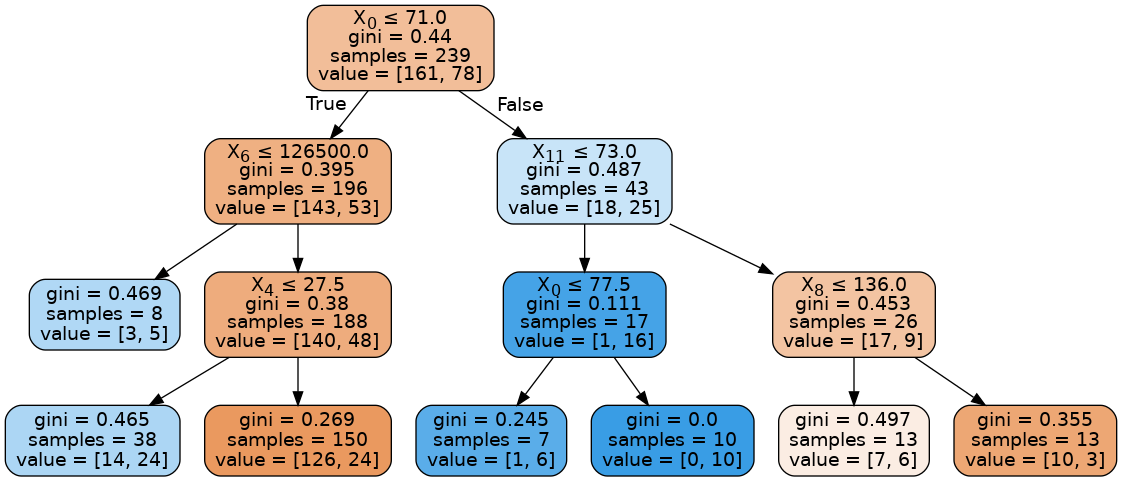

In [11]:
# display first decision tree model
utils.display_tree(dt_1)

In [12]:
# accuracy using score method
dt_1.score(X_validation, Y_validation)

0.7666666666666667

### Second Decision Tree

In [13]:
# creating the first decision tree model
dt_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=1, max_features=3
                              , min_impurity_decrease=0.0, min_samples_leaf=5
                              , min_samples_split=5, random_state=12)

In [14]:
# training the model
dt_2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features=3,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=12)

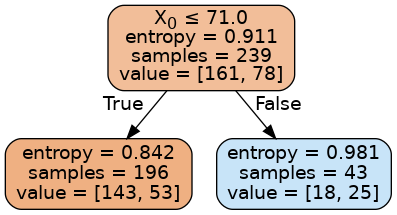

In [15]:
# display second decision tree model
utils.display_tree(dt_2)

In [16]:
# accuracy of the model using score method
dt_2.score(X_validation, Y_validation)

0.7

**On your best decision tree models, use the classification_report and confusion_matrix functions in sklearn to display metrics, using training and validation (but not testing) data. Also use the display_tree method in utils.py to display each tree.**

In [17]:
# using GridSearchCV to choose the best model and storing it in a new decision tree model
dt_3 = GridSearchCV(DecisionTreeClassifier(random_state=12), param_grid={
      'criterion':['gini','entropy']
    , 'max_depth':[1,3,5,7,9] 
    , 'min_samples_leaf': [3,4,7,5]
    , 'min_samples_split': [5,1,2]
})

In [18]:
# training the model
dt_3.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=12),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9],
                         'min_samples_leaf': [3, 4, 7, 5],
                         'min_samples_split': [5, 1, 2]})

In [19]:
dt_3.score(X_validation, Y_validation)

0.8666666666666667

In [20]:
# according to grid search, the parameters of the best model
dt_3.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

With the help of GridSearchCV module, it is clear that the best parameter to classify the best decision tree model is when we use the criterion as 'gini'.

In [21]:
# best hyperparameter were extimated and created a model
best_hyper = dt_3.best_estimator_

best_hyper.score(X_validation, Y_validation)

0.8666666666666667

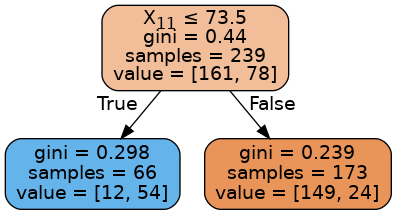

In [22]:
# display third decision tree model
utils.display_tree(best_hyper)

In [23]:
# prediction on validation and training set
Y_val_pred = dt_1.predict(X_validation)
Y_train_pred = dt_1.predict(X_train)

### Training accuracies 

In [24]:
# display the classification report
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       161
           1       0.71      0.58      0.64        78

    accuracy                           0.79       239
   macro avg       0.76      0.73      0.74       239
weighted avg       0.78      0.79      0.78       239



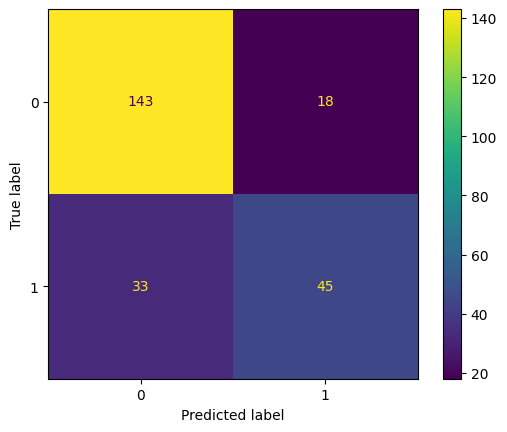

In [25]:
# display the confusion matrix
con_mat = confusion_matrix(Y_train, Y_train_pred, labels = dt_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = dt_1.classes_)
disp.plot()
plt.show()

### Validation accuracies 

In [26]:
# display the classification report
print(classification_report(Y_validation, Y_val_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       0.71      0.50      0.59        10

    accuracy                           0.77        30
   macro avg       0.75      0.70      0.71        30
weighted avg       0.76      0.77      0.75        30



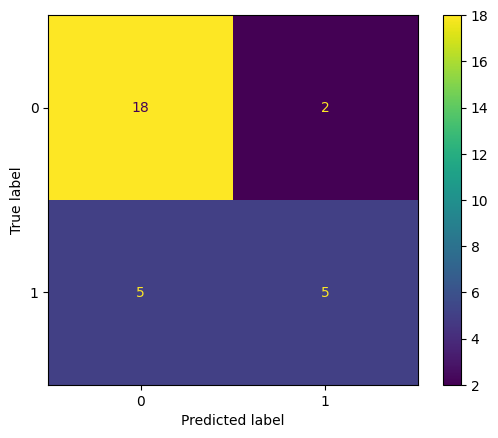

In [27]:
# display the confusion matrix
con_mat = confusion_matrix(Y_validation, Y_val_pred, labels = dt_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = dt_1.classes_)
disp.plot()
plt.show()

**Select and justify your final choice of hyperparameters based on the training and validation metrics. Provide a written analysis in markdown.**

The first decision tree model can be considered as the optiomal solution even though its accuracy is not too much. The reason is because no matter the accuracy of the other two is high as compared to the first one, but the other two underfit the model and hence can not be considerded to be the best model choice.

The final choice of hyperparameters are: {'criterion': 'gini', 'max_depth': 1,'min_samples_leaf': 3,
 'min_samples_split': 5}, and these values are given by the GridSearchCV module.

# Support Vector Machine

**Experiment with different values of the C parameter; try the linear, rbf (with different choices of gamma) and polynomial kernels (with different degrees).**

In [28]:
svm_1 = SVC(kernel = 'linear')
svm_1.fit(X_train, Y_train)

SVC(kernel='linear')

In [29]:
svm_1.score(X_validation, Y_validation)

0.8

In [30]:
# C = 0.01
svm_c_001 = SVC(kernel='linear', C=0.01 )
svm_c_001.fit(X_train, Y_train)
print("C = 0.01")
print("Accuracy:", svm_c_001.score(X_validation, Y_validation))

C = 0.01
Accuracy: 0.8


In [31]:
# C = 400
svm_c_400 = SVC(kernel='linear', C=400, max_iter = 50)
svm_c_400.fit(X_train, Y_train)
print("C = 400")
print("Accuracy:", svm_c_400.score(X_validation, Y_validation))

C = 400
Accuracy: 0.4666666666666667


In [32]:
# gamma = 1
svm_gamma_1 = SVC(kernel='rbf', gamma=1)
svm_gamma_1.fit(X_train, Y_train)
print("Gamma = 1")
print("Accuracy:", svm_gamma_1.score(features, labels))

Gamma = 1
Accuracy: 0.939799331103679


In [33]:
# gamma = 20
svm_gamma_20 = SVC(kernel='rbf', gamma=20)
svm_gamma_20.fit(X_train, Y_train)
print("Gamma = 20")
print("Accuracy:", svm_gamma_20.score(features, labels))

Gamma = 20
Accuracy: 0.939799331103679


In [34]:
# Degree = 2
svm_degree_2 = SVC(kernel='poly', degree=2)
svm_degree_2.fit(X_train, Y_train)
print("Polynomial kernel of degree = 2")
print("Accuracy:", svm_degree_2.score(X_validation, Y_validation))

Polynomial kernel of degree = 2
Accuracy: 0.6666666666666666


In [35]:
# Degree = 4
svm_degree_4 = SVC(kernel='poly', degree=4)
svm_degree_4.fit(X_train, Y_train)
print("Polynomial kernel of degree = 4")
print("Accuracy:", svm_degree_4.score(X_validation, Y_validation))

Polynomial kernel of degree = 4
Accuracy: 0.6666666666666666


**Use the classification_report and confusion_matrix functions in sklearn todisplay metrics for your best models, using training and validation (but not testing) data.**

In [36]:
svm_2 = GridSearchCV(SVC(gamma = 'auto', max_iter = 10)
    , {
        'C': [1,10,0.01]
       , 'kernel': ['linear', 'rbf']
      }
)

In [37]:
svm_2.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(gamma='auto', max_iter=10),
             param_grid={'C': [1, 10, 0.01], 'kernel': ['linear', 'rbf']})

In [38]:
svm_2.best_params_

{'C': 1, 'kernel': 'linear'}

In [39]:
svm_2.score(X_validation, Y_validation)

0.4666666666666667

In [40]:
# prediction on validation and training set
Y_val_pred = svm_1.predict(X_validation)
Y_train_pred = svm_1.predict(X_train)

## Training accuracies

In [41]:
# display the classification report
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       161
           1       0.77      0.69      0.73        78

    accuracy                           0.83       239
   macro avg       0.81      0.80      0.80       239
weighted avg       0.83      0.83      0.83       239



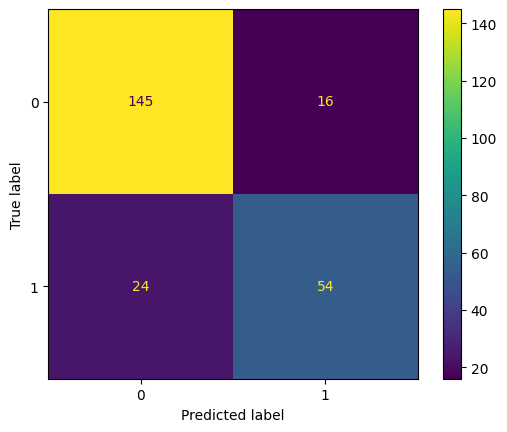

In [42]:
# display the confusion matrix
con_mat = confusion_matrix(Y_train, Y_train_pred, labels = svm_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = svm_1.classes_)
disp.plot()
plt.show()

## Validation accuracies

In [43]:
# display the classification report
print(classification_report(Y_validation, Y_val_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.75      0.60      0.67        10

    accuracy                           0.80        30
   macro avg       0.78      0.75      0.76        30
weighted avg       0.80      0.80      0.79        30



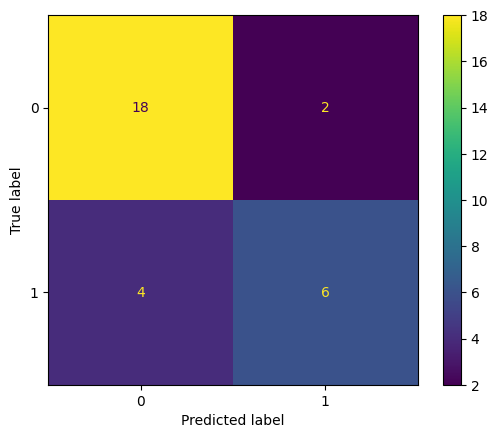

In [44]:
# display the confusion matrix
con_mat = confusion_matrix(Y_validation, Y_val_pred, labels = svm_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = svm_1.classes_)
disp.plot()
plt.show()

**Comparison 1**

Out of the decision tree models, the first_decision_tree can be considered as the optimal solution and its accuracy is also high, also the other two models underfit.

**Comparison 2**

In [45]:
Y_test_pred = svm_1.predict(X_test)

In [46]:
# display the classification report
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.60      0.38      0.46         8

    accuracy                           0.77        30
   macro avg       0.70      0.64      0.66        30
weighted avg       0.75      0.77      0.75        30



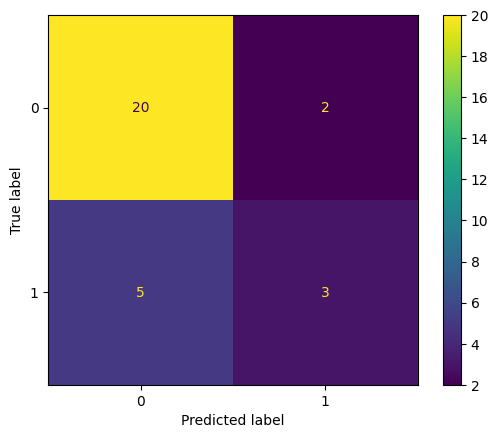

In [47]:
# display the confusion matrix
con_mat = confusion_matrix(Y_test, Y_test_pred, labels = dt_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = svm_1.classes_)
disp.plot()
plt.show()

**Comparison 3**

The best model id dt_1 as it can be considered as optimal solution whereas some underfits.
For the use case of my model, decision tree is better than the svm, as the accuracy is high and gives the optimal solutions.